<a href="https://colab.research.google.com/github/keigomiyagawa/drpp_instance/blob/master/DRPP_instance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 初期グリッドの生成

900
900
{'node_num': 0, 'node_x': 1, 'node_y': 1, 'node_degree': 0}


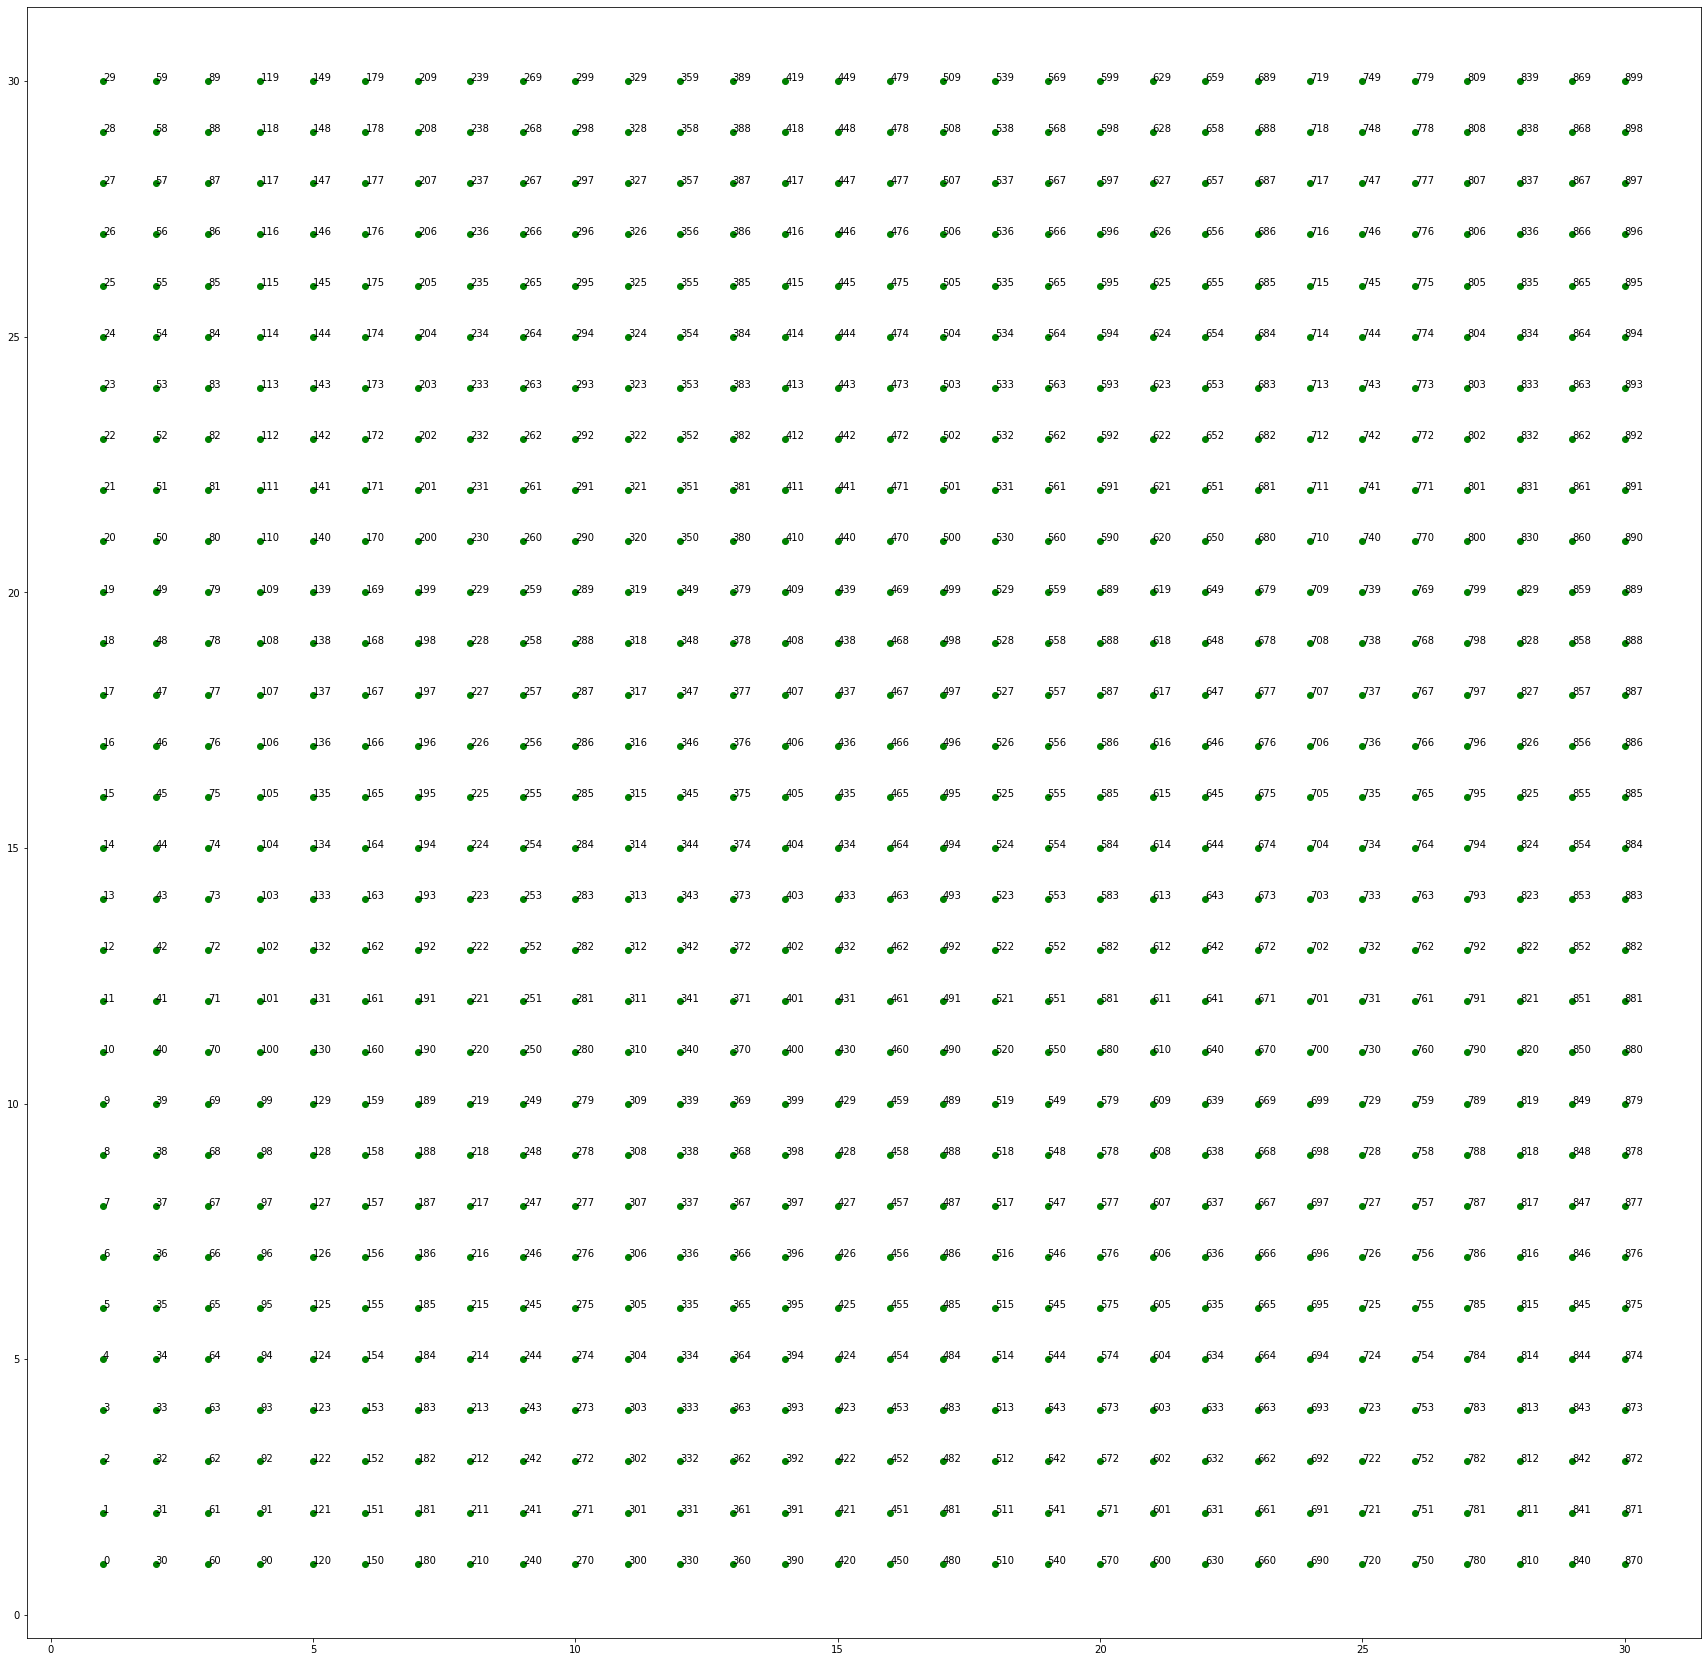

In [305]:
import matplotlib.pyplot as plt
from IPython.core.display import deepcopy
import copy
import sys
import random
random.seed(12345)

GRIDSIZE = 30
n = m = GRIDSIZE
N = range(n)
xx = list() #x座標
yy = list() #y座標
point = list()
NODE = dict()
# NODE_LISTの要素は点番号：node_num,点のx座標：node_x，点のy座標：node_y，点の次数:node_degreeの辞書リスト
NODE_LIST = list()
dem = list() #demand
# p = 

for i in range(1,n+1):
    for j in range(1,n+1):
        NODE = {}
        point.append([i,j])
# print(point)
colors = ['green' for i in range(len(point))]
data_index = [j for j in range(len(point))]

print(len(data_index))
print(len(point))

for i in range(len(point)):
    NODE = {'node_num':data_index[i],'node_x':point[i][0], 'node_y':point[i][1],'node_degree':0}
    NODE_LIST.append(NODE)
print(NODE_LIST[0])

# plot graph
for i in range(len(NODE_LIST)):
    x = NODE_LIST[i]['node_x']
    y = NODE_LIST[i]['node_y']

    plt.rcParams["figure.figsize"] = (30, 30)
    plt.scatter(x, y, color=colors[i])
    plt.annotate(NODE_LIST[i]['node_num'], xy = (x,y))

# Graph Plot

In [289]:
def plot_graph(node_LIST,edge_LIST):
    cl = "green"
    for i in range(len(node_LIST)):
        x = node_LIST[i]['node_x']
        y = node_LIST[i]['node_y']

        plt.rcParams["figure.figsize"] = (15, 15)
        if node_LIST[i]['node_degree'] % 2 != 0:
            cl = "red"
        elif node_LIST[i]['node_degree'] % 2 == 0:
            cl = "green"
        plt.scatter(x, y, color=cl)
        plt.annotate(node_LIST[i]['node_num'], xy = (x,y))
    for i in range(len(edge_LIST)):
        u, v = edge_LIST[i]['start_node'], edge_LIST[i]['end_node']
        for j in range(len(node_LIST)):
            if u == node_LIST[j]['node_num']:
                xu = node_LIST[j]['node_x']
                yu = node_LIST[j]['node_y']
            if v == node_LIST[j]['node_num']:
                xv = node_LIST[j]['node_x']
                yv = node_LIST[j]['node_y']
        plt.plot([xu, xv], [yu, yv], color="black")


# 次数アップデート

In [290]:
def update_degree(mode,NODE_LIST,start_node,end_node):
    if mode == 'add':
        for i in range(len(NODE_LIST)):
            node_num = NODE_LIST[i]['node_num']
            if node_num == start_node:
                NODE_LIST[i]['node_degree'] += 1
            if node_num == end_node:
                NODE_LIST[i]['node_degree'] += 1
    if mode == 'remove':
        # print('rem')
        for i in range(len(NODE_LIST)):
            node_num = NODE_LIST[i]['node_num']
            if node_num == start_node:
                # print(NODE_LIST[i]['node_degree'])
                NODE_LIST[i]['node_degree'] -= 1
                # print(NODE_LIST[i]['node_degree'])
            if node_num == end_node:
                NODE_LIST[i]['node_degree'] -= 1

# 初期辺の追加

In [291]:
#EDGE_LISTの要素は，始点の点番号：start_node,終点の点番号：end_nodeの辞書型リスト（＋コスト：）
EDGE_LIST = list()
edge = dict()
diagonal_p = 0.6

# add verticals
for k in range(0,n*m,GRIDSIZE):
    for i in range(k,GRIDSIZE+k,GRIDSIZE):
        for j in range(i,GRIDSIZE+i-1):
            start_node = j
            end_node = j+1
            edge = {'start_node':start_node,'end_node':end_node}
            update_degree('add',NODE_LIST,start_node,end_node)
            EDGE_LIST.append(edge)

# add horizons
for i in range(GRIDSIZE):
    for j in range(0+i,n*m+i-GRIDSIZE,GRIDSIZE):
        # print(j,j+GRIDSIZE)
        start_node = j
        end_node = j+GRIDSIZE
        edge = {'start_node':start_node,'end_node':end_node}
        update_degree('add',NODE_LIST,start_node,end_node)
        EDGE_LIST.append(edge)

## add diagonals
# upper right
for k in range(0,n*m-GRIDSIZE,GRIDSIZE):
    for i in range(k,GRIDSIZE+k,GRIDSIZE):
        for j in range(i,GRIDSIZE+i-1):
            # print(j,j+GRIDSIZE+1)

            # 一定確率で対角線を追加
            gen_rand = random.random()
            if gen_rand < diagonal_p:
                start_node = j
                end_node = j+GRIDSIZE+1
                edge = {'start_node':start_node,'end_node':end_node}
                update_degree('add',NODE_LIST,start_node,end_node)
                EDGE_LIST.append(edge)

# upper left
for k in range(n*m-GRIDSIZE,0,-GRIDSIZE):
    for i in range(k,GRIDSIZE+k,GRIDSIZE):
        for j in range(i,GRIDSIZE+i-1):
            # print(j-GRIDSIZE+1,j)

            # 一定確率で対角線を追加
            gen_rand = random.random()
            if gen_rand < diagonal_p:
                start_node = j-GRIDSIZE+1
                end_node = j
                edge = {'start_node':start_node,'end_node':end_node}
                update_degree('add',NODE_LIST,start_node,end_node)
                EDGE_LIST.append(edge)

print(NODE_LIST)
print(EDGE_LIST)

# backup
# edge_list = list()
# # add verticals
# for k in range(0,n*m,GRIDSIZE):
#     for i in range(k,GRIDSIZE+k,GRIDSIZE):
#         for j in range(i,GRIDSIZE+i-1):
#             # print(j,j+1)
#             edge_list.append([j,j+1])

# # add horizons
# for i in range(GRIDSIZE):
#     for j in range(0+i,n*m+i-GRIDSIZE,GRIDSIZE):
#         # print(j,j+GRIDSIZE)
#         edge_list.append([j,j+GRIDSIZE])

# ## add diagonals
# # upper right
# for k in range(0,n*m-GRIDSIZE,GRIDSIZE):
#     for i in range(k,GRIDSIZE+k,GRIDSIZE):
#         for j in range(i,GRIDSIZE+i-1):
#             # print(j,j+GRIDSIZE+1)

#             # 一定確率で対角線を追加
#             gen_rand = random.random()
#             if gen_rand < diagonal_p:
#                 edge_list.append([j,j+GRIDSIZE+1])
# # upper left
# for k in range(n*m-GRIDSIZE,0,-GRIDSIZE):
#     for i in range(k,GRIDSIZE+k,GRIDSIZE):
#         for j in range(i,GRIDSIZE+i-1):
#             # print(j-GRIDSIZE+1,j)

#             # 一定確率で対角線を追加
#             gen_rand = random.random()
#             if gen_rand < diagonal_p:
#                 edge_list.append([j-GRIDSIZE+1,j])

### plot graph
# plot_graph(NODE_LIST,EDGE_LIST)

# ### plot graph
# # Plot point
# for i in range(len(NODE_LIST)):
#     x = NODE_LIST[i]['node_x']
#     y = NODE_LIST[i]['node_y']

#     plt.rcParams["figure.figsize"] = (15, 15)
#     plt.scatter(x, y, color=colors[i])
#     plt.annotate(NODE_LIST[i]['node_num'], xy = (x,y))
# # Plot initial_edge
# for i in range(len(EDGE_LIST)):
#     u, v = EDGE_LIST[i]['start_node'], EDGE_LIST[i]['end_node']
#     # print(u,v)
#     # print(point[u][0], point[v][0], point[u][1], point[v][1])
#     plt.plot([point[u][0], point[v][0]], [point[u][1], point[v][1]], color="black")

[{'node_num': 0, 'node_x': 1, 'node_y': 1, 'node_degree': 3}, {'node_num': 1, 'node_x': 1, 'node_y': 2, 'node_degree': 5}, {'node_num': 2, 'node_x': 1, 'node_y': 3, 'node_degree': 3}, {'node_num': 3, 'node_x': 1, 'node_y': 4, 'node_degree': 4}, {'node_num': 4, 'node_x': 1, 'node_y': 5, 'node_degree': 4}, {'node_num': 5, 'node_x': 1, 'node_y': 6, 'node_degree': 4}, {'node_num': 6, 'node_x': 1, 'node_y': 7, 'node_degree': 4}, {'node_num': 7, 'node_x': 1, 'node_y': 8, 'node_degree': 4}, {'node_num': 8, 'node_x': 1, 'node_y': 9, 'node_degree': 4}, {'node_num': 9, 'node_x': 1, 'node_y': 10, 'node_degree': 5}, {'node_num': 10, 'node_x': 1, 'node_y': 11, 'node_degree': 4}, {'node_num': 11, 'node_x': 1, 'node_y': 12, 'node_degree': 4}, {'node_num': 12, 'node_x': 1, 'node_y': 13, 'node_degree': 5}, {'node_num': 13, 'node_x': 1, 'node_y': 14, 'node_degree': 4}, {'node_num': 14, 'node_x': 1, 'node_y': 15, 'node_degree': 4}, {'node_num': 15, 'node_x': 1, 'node_y': 16, 'node_degree': 5}, {'node_num

# ランダムに辺を選択，リスト生成

In [292]:
def make_choise_random_edge_node(NODE_LIST,EDGE_LIST,p):
    ADD_EDGE_LIST = list()
    REM_NODE_LIST = list()
    ### initialize removed_edge_temp
    removed_edge_temp = copy.deepcopy(EDGE_LIST)
    for i in range(len(removed_edge_temp)):
        removed_edge_temp[i]['status'] = 'remove'

    ### initialize removed_node_temp
    removed_node_temp = copy.deepcopy(NODE_LIST)
    for i in range(len(removed_node_temp)):
        removed_node_temp[i]['status'] = 'add'

    remove_p = 1-p
    ADD_EDGE_LIST = list()
    # print(removed_edge_temp)


    for i in range(len(removed_edge_temp)):
        gen_rand = random.random()
        if gen_rand < p:
            removed_edge_temp[i]['status'] = 'add'
    # print(removed_edge_temp)

    for i in removed_edge_temp:
        if i['status'] == 'remove':
            start_node = i['start_node']
            end_node = i['end_node']
            # print(start_node,end_node)
            update_degree('remove',removed_node_temp,start_node,end_node)
        if i['status'] == 'add':
            ADD_EDGE_LIST.append(i)
    ##remove not important point
    # print(ADD_EDGE_LIST)
    for i in range(len(removed_node_temp)):
        # print(NODE_LIST[i])
        if removed_node_temp[i]['node_degree'] == 0:
            removed_node_temp[i]['status'] = 'remove'

    for i in removed_node_temp:
        if i['status'] == 'add':
            REM_NODE_LIST.append(i)
    # print(REM_NODE_LIST)
    return ADD_EDGE_LIST,REM_NODE_LIST

# 不要点削除

In [293]:
def make_remove_not_important_node(NODE_LIST,EDGE_LIST):
    ADD_EDGE_LIST = list()
    REM_NODE_LIST = list()
    ### initialize removed_node_temp
    removed_node_temp = copy.deepcopy(NODE_LIST)
    for i in range(len(removed_node_temp)):
        removed_node_temp[i]['status'] = 'add'

    ##remove not important point
    # print(ADD_EDGE_LIST)
    for i in range(len(removed_node_temp)):
        # print(NODE_LIST[i])
        if removed_node_temp[i]['node_degree'] == 0:
            removed_node_temp[i]['status'] = 'remove'

    for i in removed_node_temp:
        if i['status'] == 'add':
            REM_NODE_LIST.append(i)
    # print(REM_NODE_LIST)
    return REM_NODE_LIST

# オイラー閉路をランダムに生成

[{'node_num': 0, 'node_x': 1, 'node_y': 1, 'node_degree': 3}, {'node_num': 1, 'node_x': 1, 'node_y': 2, 'node_degree': 5}, {'node_num': 2, 'node_x': 1, 'node_y': 3, 'node_degree': 3}, {'node_num': 3, 'node_x': 1, 'node_y': 4, 'node_degree': 4}, {'node_num': 4, 'node_x': 1, 'node_y': 5, 'node_degree': 4}, {'node_num': 5, 'node_x': 1, 'node_y': 6, 'node_degree': 4}, {'node_num': 6, 'node_x': 1, 'node_y': 7, 'node_degree': 4}, {'node_num': 7, 'node_x': 1, 'node_y': 8, 'node_degree': 4}, {'node_num': 8, 'node_x': 1, 'node_y': 9, 'node_degree': 4}, {'node_num': 9, 'node_x': 1, 'node_y': 10, 'node_degree': 5}, {'node_num': 10, 'node_x': 1, 'node_y': 11, 'node_degree': 4}, {'node_num': 11, 'node_x': 1, 'node_y': 12, 'node_degree': 4}, {'node_num': 12, 'node_x': 1, 'node_y': 13, 'node_degree': 5}, {'node_num': 13, 'node_x': 1, 'node_y': 14, 'node_degree': 4}, {'node_num': 14, 'node_x': 1, 'node_y': 15, 'node_degree': 4}, {'node_num': 15, 'node_x': 1, 'node_y': 16, 'node_degree': 5}, {'node_num

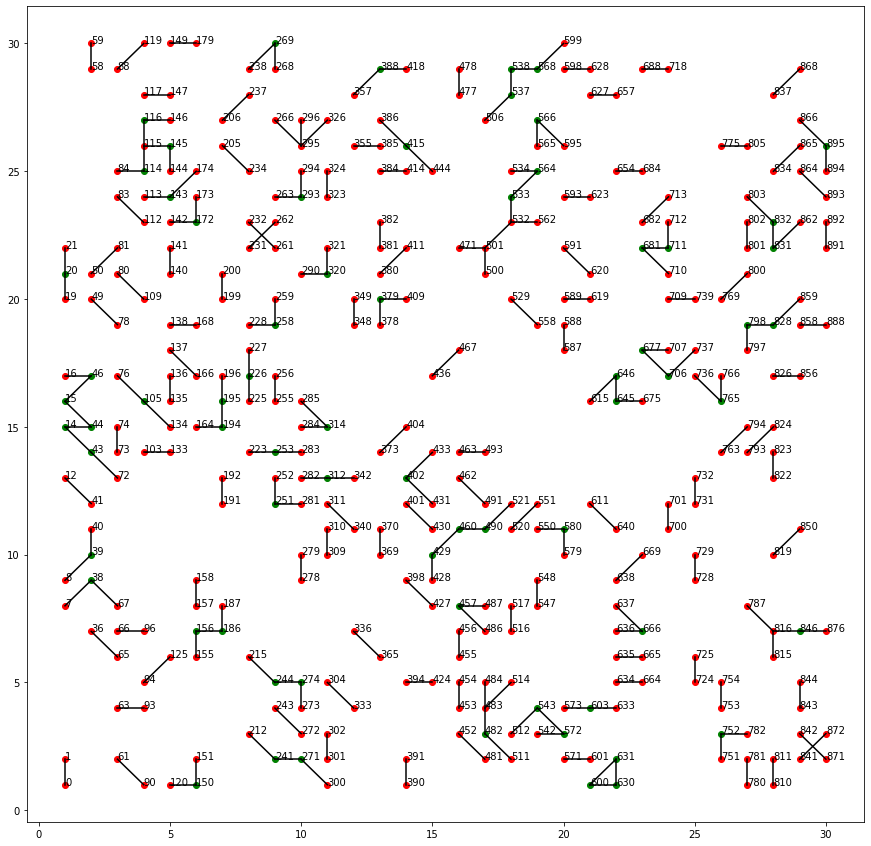

In [294]:
#p probability that an edge of the original grid is declared required
p = 0.08
ADD_EDGE_LIST = list()
REM_NODE_LIST = list()
print(NODE_LIST)
# print(len(NODE_LIST))

ADD_EDGE_LIST, REM_NODE_LIST = make_choise_random_edge_node(NODE_LIST,EDGE_LIST,p)

# ### initialize removed_edge_temp
# removed_edge_temp = copy.deepcopy(EDGE_LIST)
# for i in range(len(removed_edge_temp)):
#     removed_edge_temp[i]['status'] = 'remove'

# ### initialize removed_node_temp
# removed_node_temp = copy.deepcopy(NODE_LIST)
# for i in range(len(removed_node_temp)):
#     removed_node_temp[i]['status'] = 'add'

# remove_p = 1-p

# # print(removed_edge_temp)


# for i in range(len(removed_edge_temp)):
#     gen_rand = random.random()
#     if gen_rand < p:
#         removed_edge_temp[i]['status'] = 'add'
# # print(removed_edge_temp)

# for i in removed_edge_temp:
#     if i['status'] == 'remove':
#         start_node = i['start_node']
#         end_node = i['end_node']
#         # print(start_node,end_node)
#         update_degree('remove',removed_node_temp,start_node,end_node)
#     if i['status'] == 'add':
#         ADD_EDGE_LIST.append(i)
# print(ADD_EDGE_LIST)
# print(removed_node_temp)

# ##remove not important point
# # print(ADD_EDGE_LIST)
# for i in range(len(removed_node_temp)):
#     # print(NODE_LIST[i])
#     if removed_node_temp[i]['node_degree'] == 0:
#         removed_node_temp[i]['status'] = 'remove'

# for i in removed_node_temp:
#     if i['status'] == 'add':
#         REM_NODE_LIST.append(i)
# print(REM_NODE_LIST)


### plot graph
plot_graph(REM_NODE_LIST,ADD_EDGE_LIST)
print(REM_NODE_LIST)
print(ADD_EDGE_LIST)

# 番号振り直し

In [295]:
def renumber(NODE_LIST,EDGE_LIST):
    for i in range(len(NODE_LIST)):
        renum_node_num = NODE_LIST[i]['node_num']
        NODE_LIST[i]['node_num'] = i
        for j in range(len(EDGE_LIST)):
            if renum_node_num == EDGE_LIST[j]['start_node']:
                EDGE_LIST[j]['start_node'] = i
            if renum_node_num == EDGE_LIST[j]['end_node']:
                EDGE_LIST[j]['end_node'] = i

# RPPinstanceの生成

In [296]:
def instance_perturb(input_NODE):
    max_pert = 0.3
    min_pert = -0.3
    # perturb_rate = 
    # renumber(input_NODE)
    for i in range(len(input_NODE)):
        get_rand = random.random() * ( max_pert - min_pert ) + min_pert
        input_NODE[i]['node_x'] += get_rand
        get_rand = random.random() * ( max_pert - min_pert ) + min_pert
        input_NODE[i]['node_y'] += get_rand

In [297]:
def remove_one_edge(input_NODE,input_EDGE):
    for i in range(len(input_NODE)):
        if input_NODE[i]['node_degree'] == 1:
            node_num_start = input_NODE[i]['node_num']
            for j in range(len(input_NODE)):
                if i == j:
                    continue
                if input_NODE[j]['node_degree'] == 1:
                    node_num_end = input_NODE[j]['node_num']
                    for k in range(len(input_EDGE)):
                        if node_num_start == input_EDGE[k]['start_node'] and node_num_end == input_EDGE[k]['end_node']:
                            del input_EDGE[k]
                            break

In [298]:
def aiueo(input_NODE,input_EDGE):
    ONEEDGE_ONLY_LIST = list()
    ONEEDGE_ONLY_NODE_LIST = list()
    count = 0
    for i in range(len(input_NODE)):
        if input_NODE[i]['node_degree'] == 1:
            node_num_start = input_NODE[i]['node_num']
            for j in range(len(input_NODE)):
                if i == j:
                    continue
                if input_NODE[j]['node_degree'] == 1:
                    node_num_end = input_NODE[j]['node_num']
                    for k in range(len(input_EDGE)):
                        if node_num_start == input_EDGE[k]['start_node'] and node_num_end == input_EDGE[k]['end_node']:
                            # print(input_NODE[i]['node_degree'])
                            ONEEDGE_ONLY_NODE_LIST.append(input_NODE[i])
                            ONEEDGE_ONLY_NODE_LIST.append(input_NODE[j])
                            input_EDGE[k]['label'] = count
                            ONEEDGE_ONLY_LIST.append(input_EDGE[k])
                            count += 1
                            break
    # print(input_NODE)
    print(ONEEDGE_ONLY_LIST)
    return ONEEDGE_ONLY_NODE_LIST,ONEEDGE_ONLY_LIST

In [299]:
def make_pickupone_edgelist(input_NODE,input_EDGE):
    ONEEDGE_ONLY_LIST = list()
    ONEEDGE_ONLY_NODE_LIST = list()
    for i in range(len(input_NODE)):
        if input_NODE[i]['node_degree'] == 1:
            node_num_start = input_NODE[i]['node_num']
            for j in range(len(input_NODE)):
                if i == j:
                    continue
                if input_NODE[j]['node_degree'] == 1:
                    node_num_end = input_NODE[j]['node_num']
                    for k in range(len(input_EDGE)):
                        if node_num_start == input_EDGE[k]['start_node'] and node_num_end == input_EDGE[k]['end_node']:
                            # print(input_NODE[i]['node_degree'])
                            input_NODE[i]['node_degree'] = 0
                            input_NODE[j]['node_degree'] = 0
                            ONEEDGE_ONLY_LIST.append(input_EDGE[k])
                            break
    # print(input_NODE)
    print(ONEEDGE_ONLY_LIST)
    return input_NODE,ONEEDGE_ONLY_LIST

[{'start_node': 0, 'end_node': 1, 'status': 'add', 'label': 0}, {'start_node': 4, 'end_node': 15, 'status': 'add', 'label': 1}, {'start_node': 11, 'end_node': 25, 'status': 'add', 'label': 2}, {'start_node': 19, 'end_node': 32, 'status': 'add', 'label': 3}, {'start_node': 20, 'end_node': 34, 'status': 'add', 'label': 4}, {'start_node': 21, 'end_node': 22, 'status': 'add', 'label': 5}, {'start_node': 23, 'end_node': 38, 'status': 'add', 'label': 6}, {'start_node': 24, 'end_node': 39, 'status': 'add', 'label': 7}, {'start_node': 26, 'end_node': 41, 'status': 'add', 'label': 8}, {'start_node': 29, 'end_node': 30, 'status': 'add', 'label': 9}, {'start_node': 33, 'end_node': 44, 'status': 'add', 'label': 10}, {'start_node': 35, 'end_node': 45, 'status': 'add', 'label': 11}, {'start_node': 37, 'end_node': 51, 'status': 'add', 'label': 12}, {'start_node': 40, 'end_node': 53, 'status': 'add', 'label': 13}, {'start_node': 42, 'end_node': 54, 'status': 'add', 'label': 14}, {'start_node': 50, 'en

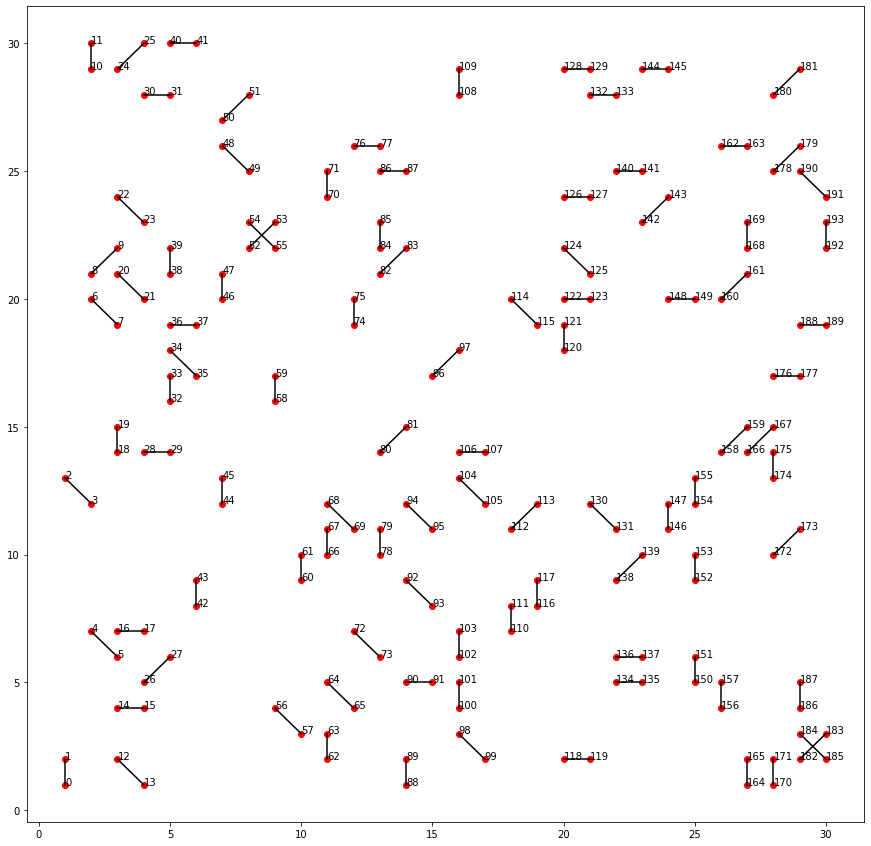

In [300]:
# instance_perturb(REM_NODE_LIST)

# remove_one_edge(REM_NODE_LIST,ADD_EDGE_LIST)
##TODO 点削除を関数化したい
renumber(REM_NODE_LIST,ADD_EDGE_LIST)

ONLYONEEDGE_NODE_LIST, ONLYONEEDGE_LIST = aiueo(REM_NODE_LIST,ADD_EDGE_LIST)
# ONLYONEEDGE_NODE_LIST = make_remove_not_important_node(ONLYONEEDGE_NODE_LIST, ONLYONEEDGE_LIST)
# print(ONLYONEEDGE_LIST)
# print(ONLYONEEDGE_NODE_LIST)
renumber(ONLYONEEDGE_NODE_LIST,ONLYONEEDGE_LIST)
# print(ONLYONEEDGE_NODE_LIST)
### plot graph
# plot_graph(REM_NODE_LIST,ADD_EDGE_LIST)
# print(ONLYONEEDGE_LIST)
plot_graph(ONLYONEEDGE_NODE_LIST,ONLYONEEDGE_LIST)

# 任意の点の座標取得

In [301]:
def get_coodinate(input_NODE,node_num):
    x = -1
    y = -1
    for i in range(len(input_NODE)):
        if node_num == input_NODE[i]['node_num']:
            x = input_NODE[i]['node_x']
            y = input_NODE[i]['node_y']
    return x,y

# 任意の２点の中間点の座標を取得

In [302]:
def get_middle_coodinate(input_NODE,node_num1,node_num2):
    x1 = x2 = -1
    y1 = y2 = -1
    for i in range(len(input_NODE)):
        if node_num1 == input_NODE[i]['node_num']:
            x1 = input_NODE[i]['node_x']
            y1 = input_NODE[i]['node_y']
        if node_num2 == input_NODE[i]['node_num']:
            x2 = input_NODE[i]['node_x']
            y2 = input_NODE[i]['node_y']
    x = (x1 + x2) / 2
    y = (y1 + y2) / 2
    return x,y

# oneedgeの距離取得

In [ ]:
def get_oneedge_cost(input_node,input_edge):
    from math import sqrt
    from copy import deepcopy
    new_edge = input_edge
    final_edge = list()
    countmax = len(new_edge)
    cost_dict = dict()
    cost_list = list()
    
    # c = {(i,j): sqrt((xx[i] - xx[j])**2 + (yy[i] - yy[j])**2) for i in N for j in N}
    # while len(new_edge):
    for i in range(len(new_edge)):
        for j in range(i%len(new_edge) + 1):
            if i == j:
                continue
            num1 = new_edge['label']
            middle_x_start, middle_y_start = get_middle_coodinate()
            middle_x_end, middle_y_end = get_middle_coodinate()
            c = sqrt((middle_x_start - middle_x_end)**2 + (middle_y_start - middle_x_end)**2)
            cost_dict['edge_index'] = [i,j]
            cost_dict['cost'] = c
            cost_list.append(cost_dict)
        print(cost_list)
        # sorted_list = sorted(cost_list,cost_list.items(), key=lambda x:x['cost'])
        # l,m = cost_list[0]['edge_index'][0],cost_list[0]['edge_index'][1]
        # l,m = sorted_list[0]['edge_index'][0],sorted_list[0]['edge_index'][1]
        # print(l)
        # print(m)
        # final = [new_edge[l]['start_node'],new_edge[l]['end_node'],new_edge[m]['start_node'],new_edge[m]['end_node'],new_edge[l]['start_node']]
        # final_edge.append(final)
        # del new_edge(l)
        # del new_edge(l)
    return final_edge

In [303]:
def get_oneedge_cost1(input_node,input_edge):
    from math import sqrt
    from copy import deepcopy
    new_edge = input_edge
    final_edge = list()

    countmax = len(new_edge)
    
    # c = {(i,j): sqrt((xx[i] - xx[j])**2 + (yy[i] - yy[j])**2) for i in N for j in N}
    # while len(new_edge):
    for k in range(2):
        cost_dict = dict()
        cost_list = list()
        for i in range(len(new_edge)):
            for j in range(i%len(new_edge) + 1):
                if i == j:
                    continue
                start_start_node_x,start_start_node_y = get_coodinate(input_node,new_edge[i]['start_node'])
                start_end_node_x,start_end_node_y = get_coodinate(input_node,new_edge[i]['end_node'])
                end_start_node_x,end_start_node_y = get_coodinate(input_node,new_edge[j]['start_node'])
                end_end_node_x,end_end_node_y = get_coodinate(input_node,new_edge[j]['end_node'])
                middle_x_start = (start_start_node_x+start_end_node_x)/2
                middle_y_start = (start_start_node_y+start_end_node_y)/2
                middle_x_end = (end_start_node_x+end_end_node_x)/2
                middle_x_end = (end_end_node_x+end_end_node_y)/2
                print(middle_x_start,middle_y_start)
                print(middle_x_end,middle_x_end)
                c = sqrt((middle_x_start - middle_x_end)**2 + (middle_y_start - middle_x_end)**2)
                cost_dict['edge_index'] = [i,j]
                cost_dict['cost'] = c
                cost_list.append(cost_dict)
            print(cost_list)
            # sorted_list = sorted(cost_list,cost_list.items(), key=lambda x:x['cost'])
            # l,m = cost_list[0]['edge_index'][0],cost_list[0]['edge_index'][1]
            # l,m = sorted_list[0]['edge_index'][0],sorted_list[0]['edge_index'][1]
            # print(l)
            # print(m)
            # final = [new_edge[l]['start_node'],new_edge[l]['end_node'],new_edge[m]['start_node'],new_edge[m]['end_node'],new_edge[l]['start_node']]
            # final_edge.append(final)
            # del new_edge(l)
            # del new_edge(l)
    return final_edge

In [304]:
print(get_middle_coodinate(ONLYONEEDGE_NODE_LIST,0,1))

(1.0, 1.5)
